### Chapter 5: Integrals and Derivatives

Trapezoidal Rule (explained via white board)

In [1]:
%matplotlib inline

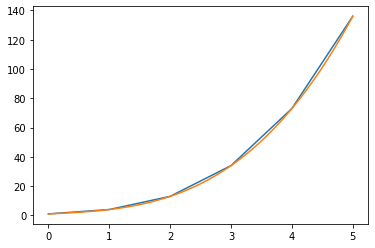

Number of slices:  6
Trapezoidal Rule Integral estimate=  190.5902777777778
Analytical Result:  186.25
Percent error = 2.3303504847129126%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 + 2*x + 1
    
N = 6
a = 0
b = 5.0
h = (b-a)/N
true_result = 186.25

s = 0.5*(f(a) + f(b))
for k in range(1,N):
    s += f(a+k*h)
  
# plot the function
x = np.linspace(a,b,N)
x2 = np.linspace(a,b,100)

plt.plot(x,f(x),x2,f(x2))
plt.show()

print("Number of slices: ",N)
print("Trapezoidal Rule Integral estimate= ",h*s)
print("Analytical Result: ",true_result)
print("Percent error = ",np.abs((h*s)-true_result)/true_result * 100,"%",sep='')





In [3]:
# Simpson's Rule

# Now Simpson's rule

s = (f(a) + f(b))

for k in range(1,N,2):
    s += 4.*f(a+k*h)
    
for k in range(2,N,2):
    s += 2.*f(a+k*h)
    
print("\nSimpson's Rule Integral estimate= ",h*s/3.)
print("Percent error = ",np.abs((h*s)/3.-true_result)/true_result * 100,"%",sep='')



Simpson's Rule Integral estimate=  186.25000000000003
Percent error = 1.525997821766658e-14%


### Gaussian Quadrature

Here's the code:

```
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
```

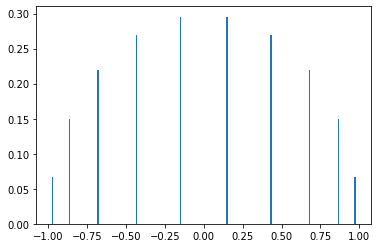

In [6]:
# Demonstrate the positions and weights of the sample points
# in Gaussian Quadrature method

from gaussxw import gaussxw
import matplotlib.pyplot as plt

N = 10
x,w = gaussxw(N)

plt.bar(x,w,width=0.01)
plt.show()


**Example 5.2: Gassian Integral of a Simple Function**

Consider the integral of $\int_0^2(x^4-2x+1)\,dx$.  The true value is 4.4.

Here we use Gaussian quadrature with $N=3$.


In [7]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# perform the integration
s = 0
for k in range(N):
    s += wp[k]*f(xp[k])
    
print(s)

4.4000000000000075


The integral gives the exact answer (to machine accuracy)

Note this was a polynomial of degree 4, so Gaussian quadrature *should* give exact answer with $N=3$

In [8]:
# compute our Trapezoidal / Simpson example with N=2

def f(x):
    return x**3 + 2*x + 1

N = 2
a = 0.
b = 5.

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# perform the integration
s = 0
for k in range(N):
    s += wp[k]*f(xp[k])
    
print(s)

186.25000000000037


Again - exact answer (to machine accuracy).

Python package 'scipy' includes gaussian quadrature (and many other techniques), so you don't really have to code this up yourself every time (after you complete this course).

In [9]:
# Quad Demo

from scipy import integrate
import numpy as np

# Example 1

f = lambda x : x**4 - 2*x + 1

y, yerr = integrate.quad(f, 0., 2.)
print(f"I = {y:.4f},   Error = {yerr}")

# Example 2

f = lambda x : x**3 + 2*x + 1

y, yerr = integrate.quad(f ,0., 5.)

print(f"I = {y:.4f},   Error = {yerr}")


# Example 3 - with limit of infinity!

f = lambda x : np.exp(-2.*x)

y, yerr = integrate.quad(f, 0., np.inf)

print(f"I = {y:.4f},   Error = {yerr}")


I = 4.4000,   Error = 5.003996496050337e-14
I = 186.2500,   Error = 2.067790383364354e-12
I = 0.5000,   Error = 7.735031683797485e-11
